<a href="https://colab.research.google.com/github/vaibhavjaybhaye09/AI_ML/blob/main/Netflix_clean_Dara.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Netflix's



In [45]:

import pandas as pd
import numpy as np
import warnings
from datetime import datetime
import re
import os


import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report,
                             roc_curve, auc, roc_auc_score)
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
print('imported successfully')

imported successfully


In [46]:
df=pd.read_csv('/content/drive/MyDrive/netflix_titles.csv')
df.shape

(8807, 12)

In [47]:
df.head
df.info()
df.describe(include='all')
df.tail(20)
df.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7561,s7562,Movie,National Bird,Sonia Kennebeck,NaN,United States,"May 8, 2017",2016,TV-MA,92 min,Documentaries,Three former military operatives offer disturb...
6123,s6124,Movie,Along Came a Spider,Lee Tamahori,"Morgan Freeman, Monica Potter, Michael Wincott...","United States, Germany, Canada","October 1, 2019",2001,R,103 min,Thrillers,When a girl is kidnapped from a prestigious pr...
5697,s5698,Movie,Across Grace Alley,Ralph Macchio,"Ben Hyland, Marsha Mason, Karina Smirnoff, Col...",United States,"December 1, 2016",2013,TV-PG,24 min,Dramas,"A young boy, upset by his parents' divorce, be..."
6638,s6639,Movie,Down The Fence,M.J. Isakson,NaN,United States,"January 15, 2018",2017,TV-PG,94 min,Documentaries,The human-equine bond propels the unique and c...
2473,s2474,TV Show,Dynasty,NaN,"Elizabeth Gillies, Nathalie Kelley, Grant Show...",United States,"May 23, 2020",2019,TV-14,3 Seasons,TV Dramas,The Carringtons and the Colbys feud for contro...
427,s428,Movie,Wannabe Courageous,Mahmoud Karim,"Ramez Galal, Jamila Awad, Bayoumi Fouad, Moham...",NaN,"July 22, 2021",2019,TV-14,90 min,"Comedies, International Movies",When his newlywed wife becomes disenchanted be...
6365,s6366,Movie,Bottom of the World,Richard Sears,"Jena Malone, Douglas Smith, Ted Levine, Tamara...","Canada, United States","May 28, 2020",2017,TV-MA,84 min,"Dramas, Independent Movies, Thrillers","En route to a fresh start in Los Angeles, youn..."
804,s805,Movie,Population 436,Michelle MacLaren,"Jeremy Sisto, Fred Durst, Charlotte Sullivan, ...","Canada, United States","June 2, 2021",2006,R,93 min,"Horror Movies, Thrillers",A census taker sent to investigate why Rockwel...
2205,s2206,Movie,Double World,Teddy Chan,"Henry Lau, Peter Ho, Lin Chenhan, Jiang Luxia,...",China,"July 25, 2020",2020,TV-14,110 min,"Action & Adventure, International Movies","Keen to bring honor to his clan, young village..."
6062,s6063,Movie,A Walk to Remember,Adam Shankman,"Mandy Moore, Shane West, Peter Coyote, Daryl H...",United States,"July 1, 2020",2002,PG,102 min,"Dramas, Romantic Movies",When bad boy Landon is cast opposite campus bo...


In [48]:
for i, col in enumerate(df.columns,1):
    print(i, col)

1 show_id
2 type
3 title
4 director
5 cast
6 country
7 date_added
8 release_year
9 rating
10 duration
11 listed_in
12 description


In [49]:
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

Number of duplicate rows: 0


In [50]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print(missing_values)
print()
print(missing_percentage)

missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing_Count': missing_values.values,
    'Percentage': missing_percentage.values
}).sort_values('Missing_Count', ascending=False)

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64


In [51]:
columns_with_missing = missing_df[missing_df['Missing_Count'] > 0]
columns_with_missing

,Column,Missing_Count,Percentage
3,director,2634,29.908028
5,country,831,9.435676
4,cast,825,9.367549
6,date_added,10,0.113546
8,rating,4,0.045418
9,duration,3,0.034064


In [52]:
columns_with_missing = missing_df[missing_df['Missing_Count'] > 0]
columns_with_missing

,Column,Missing_Count,Percentage
3,director,2634,29.908028
5,country,831,9.435676
4,cast,825,9.367549
6,date_added,10,0.113546
8,rating,4,0.045418
9,duration,3,0.034064


In [53]:
if len(columns_with_missing) > 0:
    print("\n⚠️ COLUMNS WITH MISSING VALUES:\n")
    print(columns_with_missing.to_string(index=False))
    print(f"\n📊 Total Columns with Missing Data: {len(columns_with_missing)}")
else:
    print("\n✅ No missing values found! Perfect data quality.")


⚠️ COLUMNS WITH MISSING VALUES:

    Column  Missing_Count  Percentage
  director           2634   29.908028
   country            831    9.435676
      cast            825    9.367549
date_added             10    0.113546
    rating              4    0.045418
  duration              3    0.034064

📊 Total Columns with Missing Data: 6


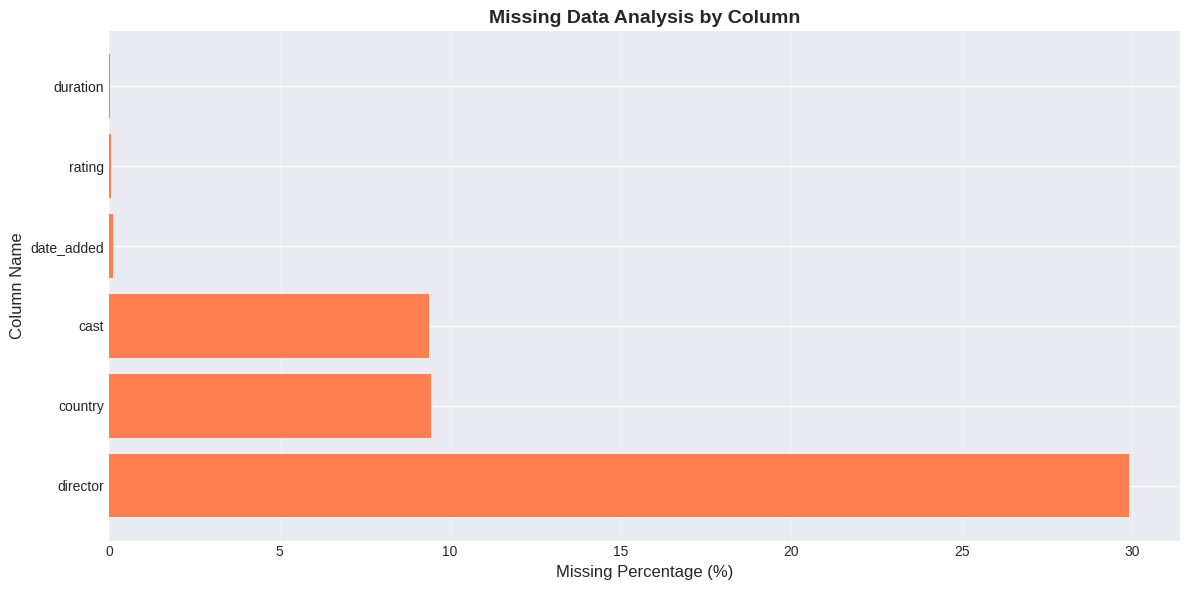

In [54]:
if len(columns_with_missing) > 0:
    plt.figure(figsize=(12, 6))
    plt.barh(columns_with_missing['Column'], columns_with_missing['Percentage'], color='coral')
    plt.xlabel('Missing Percentage (%)', fontsize=12)
    plt.ylabel('Column Name', fontsize=12)
    plt.title('Missing Data Analysis by Column', fontsize=14, fontweight='bold')
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

In [55]:
df_clean = df.copy()

initails_rows = len(df_clean)
print(initails_rows)
df_clean.drop_duplicates(inplace=True)
removed_duplicates = initails_rows - len(df_clean)
print(removed_duplicates)


8807
0


In [56]:
before_director = df_clean['director'].isnull().sum()
before_director

np.int64(2634)

In [57]:
df_clean['director'].fillna('Unknown', inplace=True)



In [58]:
before_cast = df_clean['cast'].isnull().sum()
df_clean['cast'].fillna('Not Available', inplace=True)
print(f"✅ Cast: Filled {before_cast:,} missing values with 'Not Available'")

✅ Cast: Filled 825 missing values with 'Not Available'


In [59]:
before_date = len(df_clean)
df_clean.dropna(subset=['date_added'], inplace=True)
dropped_date = before_date - len(df_clean)
print(f"🗑️ Date Added: Dropped {dropped_date} rows (< 0.2% of data)")



🗑️ Date Added: Dropped 10 rows (< 0.2% of data)


In [60]:
before_rating = df_clean['rating'].isnull().sum()
df_clean['rating'].fillna('Not Rated', inplace=True)
print(f"✅ Rating: Filled {before_rating} missing values with 'Not Rated'")


✅ Rating: Filled 4 missing values with 'Not Rated'


In [61]:
df_clean['date_added'] = pd.to_datetime(df_clean['date_added'].str.strip(), format='%B %d, %Y')
df_clean['year_added'] = df_clean['date_added'].dt.year
df_clean['month_added'] = df_clean['date_added'].dt.month
df_clean['month_name_added'] = df_clean['date_added'].dt.month_name()
print('features added successfully','year_added ,month_added ,month_name_added')


features added successfully year_added ,month_added ,month_name_added


In [62]:
def extract_duration(row):
  if pd.isna(row['duration']):
      return 0
  return int(row['duration'].split()[0])

In [63]:
df_clean['duration']

,duration
0,90 min
1,2 Seasons
2,1 Season
3,1 Season
4,2 Seasons
...,...
8802,158 min
8803,2 Seasons
8804,88 min
8805,88 min


In [64]:
df_clean['duration_value'] = df_clean.apply(extract_duration, axis=1)

In [65]:
def categorize_movie_duration(row):
    if row['type'] == 'Movie':


      if row['duration_value'] <= 60:
          return 'Short'
      elif row['duration_value']  <= 120:
          return 'Medium'
      else:
          return 'Long'
    else:
        return 'N/A'
df_clean['duration_category'] = df_clean.apply(categorize_movie_duration, axis=1)

In [66]:
df_clean['duration_category']

,duration_category
0,Medium
1,N/A
2,N/A
3,N/A
4,N/A
...,...
8802,Long
8803,N/A
8804,Medium
8805,Medium


In [67]:
before_contry = df_clean['country'].isnull().sum()
df_clean['country'].fillna('Unknown', inplace=True)
print(f"✅ Country: Filled {before_contry} missing values with 'unknown'")

✅ Country: Filled 830 missing values with 'unknown'


In [68]:
df_clean['country_count'] = df_clean['country'].apply(lambda x: len(x.split(',')))


In [69]:
df_clean['genre_count'] = df_clean['listed_in'].apply(lambda x: len(x.split(',')))
print('count feature : genre_count')

count feature : genre_count


In [70]:
df_clean['genre_count']

,genre_count
0,1
1,3
2,3
3,2
4,3
...,...
8802,3
8803,3
8804,2
8805,2


In [71]:
current_year  = 2026
df_clean['content_age'] = current_year - df_clean['release_year']

In [72]:
def categorize_content_age(age):
    """Categorize content by age"""
    if age <= 2:
        return 'Very New'
    elif age <= 5:
        return 'Recent'
    elif age <= 10:
        return 'Moderate'
    else:
        return 'Old'

df_clean['content_age_category'] = df_clean['content_age'].apply(categorize_content_age)
print("✅ Age Features: content_age, content_age_category")


✅ Age Features: content_age, content_age_category


In [73]:


remaining_missing = df_clean.isnull().sum().sum()
print(f"\n🔍 Total Missing Values: {remaining_missing}")

if remaining_missing > 0:
    print("\n⚠️ Columns still with missing values:")
    print(df_clean.isnull().sum()[df_clean.isnull().sum() > 0])
else:
    print("\n✅ PERFECT! No missing values remaining!")

# Save cleaned dataset
output_path = 'netflix_cleaned.csv'
df_clean.to_csv(output_path, index=False)
print(f"\n💾 Cleaned dataset saved: {output_path}")
print(f"📊 File size: {os.path.getsize(output_path) / 1024**2:.2f} MB")


🔍 Total Missing Values: 3

⚠️ Columns still with missing values:
duration    3
dtype: int64

💾 Cleaned dataset saved: netflix_cleaned.csv
📊 File size: 3.52 MB


In [74]:
print(f"Total Titles: {len(df_clean):,}")
print(f"Total Movies: {len(df_clean[df_clean['type'] == 'Movie']):,}")
print(f"Total TV Shows: {len(df_clean[df_clean['type'] == 'TV Show']):,}")
print(f"\nUnique Directors: {df_clean['director'].nunique():,}")
print(f"Unique Countries: {df_clean['country'].nunique():,}")
print(f"Unique Ratings: {df_clean['rating'].nunique()}")
print(f"\nYear Range: {df_clean['release_year'].min()} - {df_clean['release_year'].max()}")
print(f"Content Span: {df_clean['release_year'].max() - df_clean['release_year'].min()} years")

Total Titles: 8,797
Total Movies: 6,131
Total TV Shows: 2,666

Unique Directors: 4,529
Unique Countries: 749
Unique Ratings: 18

Year Range: 1925 - 2021
Content Span: 96 years


In [75]:
type_dist = df_clean['type'].value_counts()
print(type_dist)

print("\n📊 Percentages:")
for content_type, count in type_dist.items():
    percentage = (count / len(df_clean)) * 100
    print(f"  {content_type}: {percentage:.2f}%")

print("\n💡 INSIGHT: Netflix has approximately 70% movies and 30% TV shows")

type
Movie      6131
TV Show    2666
Name: count, dtype: int64

📊 Percentages:
  Movie: 69.69%
  TV Show: 30.31%

💡 INSIGHT: Netflix has approximately 70% movies and 30% TV shows


In [76]:
df_clean['primary_country'] = df_clean['country'].apply(lambda x: x.split(',')[0].strip())
top_countries = df_clean['primary_country'].value_counts().head(10)

print(top_countries)

print("\n💡 INSIGHT: US dominates with 36% of content, India is growing rapidly with 11%")

primary_country
United States     3205
India             1008
Unknown            830
United Kingdom     627
Canada             271
Japan              258
France             212
South Korea        211
Spain              181
Mexico             134
Name: count, dtype: int64

💡 INSIGHT: US dominates with 36% of content, India is growing rapidly with 11%


In [77]:
rating_dist = df_clean['rating'].value_counts()
print(rating_dist)

print("\n💡 INSIGHT: TV-MA and TV-14 dominate (60% combined) - mostly mature content")

rating
TV-MA        3205
TV-14        2157
TV-PG         861
R             799
PG-13         490
TV-Y7         333
TV-Y          306
PG            287
TV-G          220
NR             79
G              41
TV-Y7-FV        6
Not Rated       4
NC-17           3
UR              3
66 min          1
74 min          1
84 min          1
Name: count, dtype: int64

💡 INSIGHT: TV-MA and TV-14 dominate (60% combined) - mostly mature content


In [78]:
yearly_additions = df_clean['year_added'].sort_index(ascending=False)
print(yearly_additions)

print("\n💡 INSIGHT: Peak year was 2019 with 2,016 titles added")

8806    2019
8805    2020
8804    2019
8803    2019
8802    2019
        ... 
4       2021
3       2021
2       2021
1       2021
0       2021
Name: year_added, Length: 8797, dtype: int32

💡 INSIGHT: Peak year was 2019 with 2,016 titles added


In [79]:
yearly_additions = df_clean['year_added'].value_counts().sort_index()
yearly_additions

,count
year_added,
2008,2
2009,2
2010,1
2011,13
2012,3
2013,11
2014,24
2015,82
2016,429


In [80]:
all_genres = df_clean['listed_in'].str.split(',').explode().str.strip()
top_genres = all_genres.value_counts().head(10)
print(top_genres)


listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1350
Documentaries                869
Action & Adventure           859
TV Dramas                    762
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64


FileNotFoundError: [Errno 2] No such file or directory: 'figures/01_content_type_pie.png'

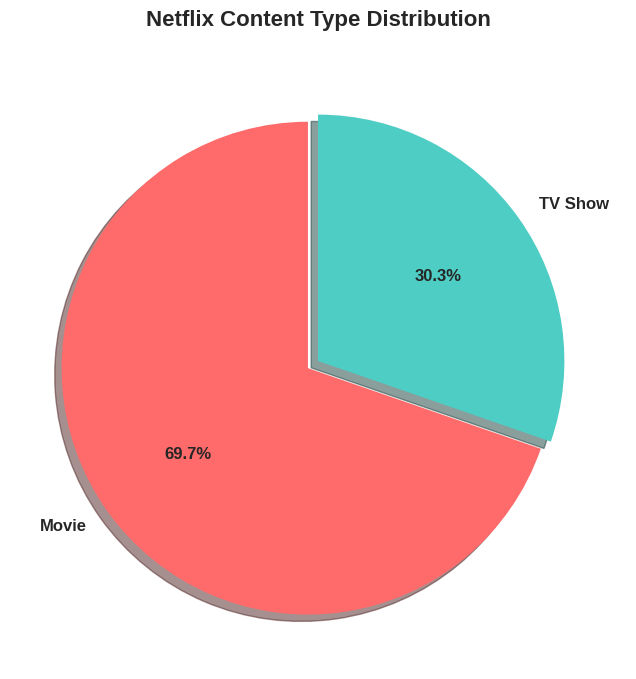

In [81]:
plt.figure(figsize=(10, 8))
type_counts = df_clean['type'].value_counts()
colors = ['#FF6B6B', '#4ECDC4']  # Red for Movies, Teal for TV Shows
explode = (0.05, 0)  # Slightly separate the largest slice

plt.pie(type_counts.values,
        labels=type_counts.index,
        autopct='%1.1f%%',  # Show percentages
        startangle=90,  # Start from top
        colors=colors,
        explode=explode,
        shadow=True,  # Add shadow for 3D effect
        textprops={'fontsize': 12, 'fontweight': 'bold'})

plt.title('Netflix Content Type Distribution',
         fontsize=16, fontweight='bold', pad=20)
plt.savefig('figures/01_content_type_pie.png', dpi=300, bbox_inches='tight')
plt.show()